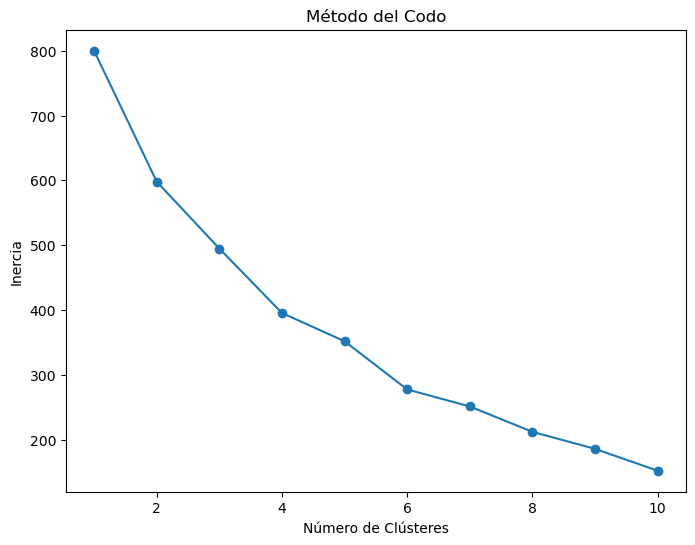

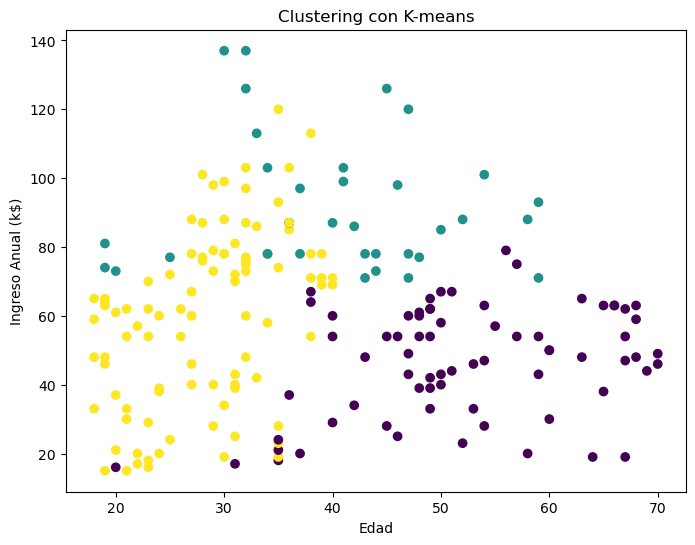

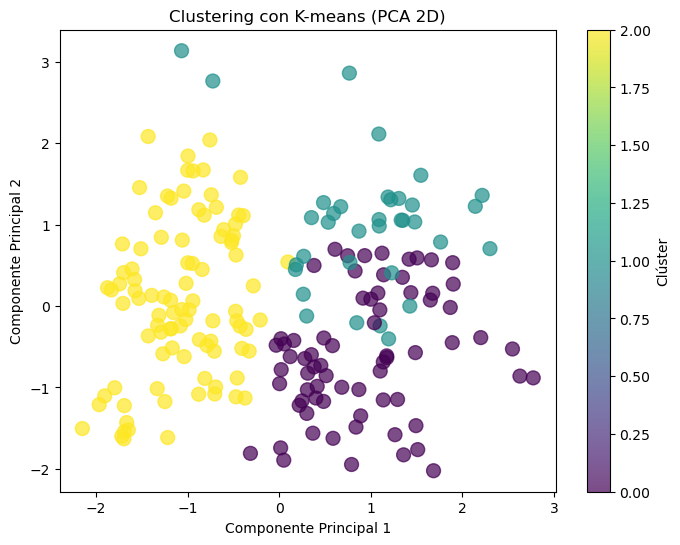

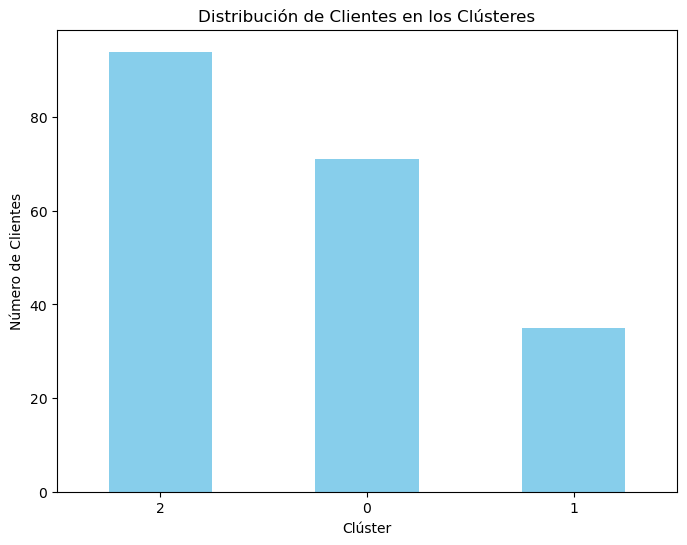

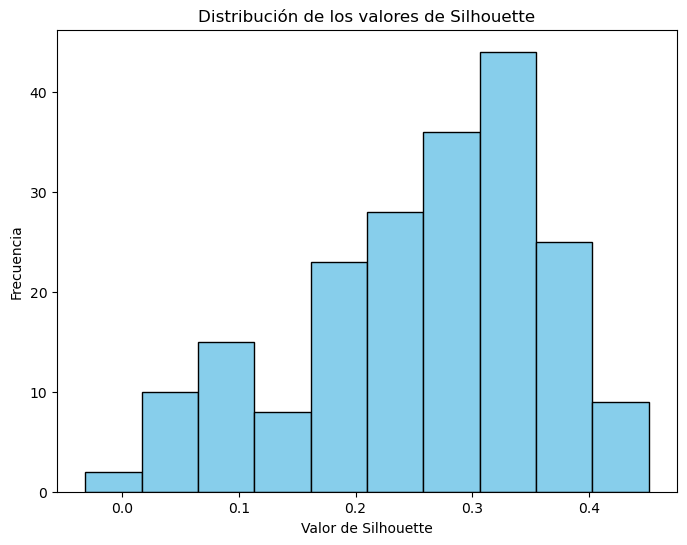

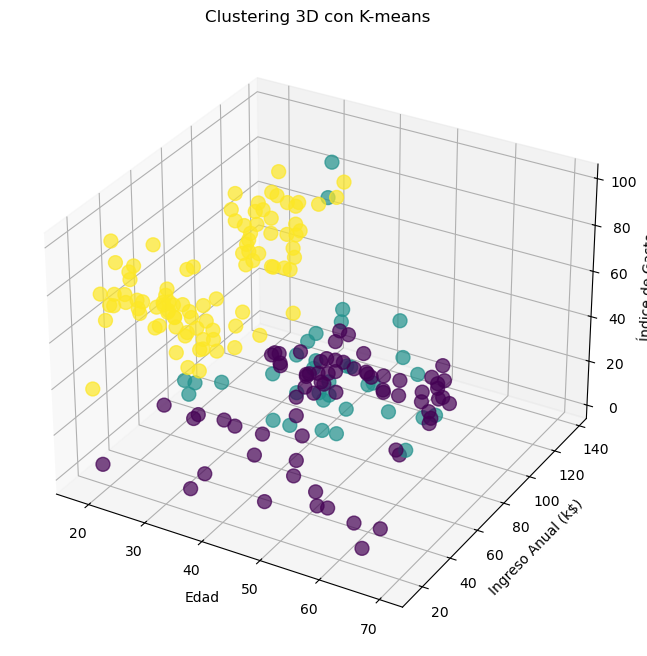

In [21]:
import os
# Configurar la variable de entorno para evitar la fuga de memoria
os.environ["OMP_NUM_THREADS"] = '1'

# Importar librerías necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# Cargar el archivo CSV
file_path = 'Anexo 5Mall_Customers.csv'
data = pd.read_csv(file_path)

# Eliminar la columna irrelevante 'CustomerID'
data_cleaned = data.drop(columns=['CustomerID'])

# Codificar la variable categórica 'Gender' (de 'Male'/'Female' a 0/1)
label_encoder = LabelEncoder()
data_cleaned['Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])

# Escalar las variables numéricas
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

# Crear un DataFrame con los datos escalados para referencia (opcional)
scaled_df = pd.DataFrame(scaled_data, columns=data_cleaned.columns)

# Ver los primeros registros de los datos escalados (esto también verifica que scaled_data esté bien definido)
# print(scaled_df.head())


# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Crear un DataFrame con las dos primeras componentes principales
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Calcular el valor de Silhouette para cada punto
silhouette_vals = silhouette_samples(scaled_data, kmeans_labels)



# Método del Codo: Calcular la inercia para diferentes valores de k
k_range = range(1, 11)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)  # Ahora debería funcionar, ya que scaled_data está definido
    inertia.append(kmeans.inertia_)

# Graficar el Método del Codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.show()

# Elegir el número óptimo de clústeres (por ejemplo, k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Agregar las etiquetas de clúster al DataFrame
data_cleaned['KMeans_Cluster'] = kmeans_labels


# Ver la distribución de los clientes en los diferentes clústeres
cluster_counts = data_cleaned['KMeans_Cluster'].value_counts()



# Visualización de los resultados - Gráfico de Dispersión 2D con los Clústeres
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['Age'], data_cleaned['Annual Income (k$)'], c=data_cleaned['KMeans_Cluster'], cmap='viridis')
plt.title('Clustering con K-means')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.show()



# Graficar los clústeres en el espacio de las dos primeras componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=data_cleaned['KMeans_Cluster'], cmap='viridis', s=100, alpha=0.7)
plt.title('Clustering con K-means (PCA 2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Clúster')
plt.show()

# Graficar la distribución de los clústeres
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Clientes en los Clústeres')
plt.xlabel('Clúster')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()

# Crear un gráfico de Silhouette
plt.figure(figsize=(8, 6))
plt.hist(silhouette_vals, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de los valores de Silhouette')
plt.xlabel('Valor de Silhouette')
plt.ylabel('Frecuencia')
plt.show()

# Seleccionar 3 características para la visualización 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Graficar en 3D
ax.scatter(data_cleaned['Age'], data_cleaned['Annual Income (k$)'], data_cleaned['Spending Score (1-100)'], c=data_cleaned['KMeans_Cluster'], cmap='viridis', s=100, alpha=0.7)
ax.set_title('Clustering 3D con K-means')
ax.set_xlabel('Edad')
ax.set_ylabel('Ingreso Anual (k$)')
ax.set_zlabel('Índice de Gasto')
plt.show()
